In [310]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np

In [259]:
plt.rcParams['figure.dpi'] = 300

In [275]:
G = nx.read_graphml("../data/orbis_network_enriched.graphml")

In [276]:
G.edges(data=True)

EdgeDataView([('50001', '50056', {'km': 54.539, 'expense_inverse': 0.5238344683080146, 'expense': 1.909, 'days': 1.818, 'route_type': 'road/road', 'gravity': 274.4025501875404, 'gravity_inverse': 0.0036442810000000005}), ('50001', '50100', {'km': 50.135, 'expense_inverse': 0.5698005698005698, 'expense': 1.755, 'days': 1.671, 'route_type': 'road/road', 'gravity': 324.67268934505404, 'gravity_inverse': 0.0030800249999999997}), ('50001', '50293', {'km': 65.681, 'expense_inverse': 0.43497172683775553, 'expense': 2.299, 'days': 2.189, 'route_type': 'road/road', 'gravity': 189.20040314821904, 'gravity_inverse': 0.0052854009999999995}), ('50001', '50473', {'km': 225.368, 'expense_inverse': 0.12677484787018256, 'expense': 7.888, 'days': 7.512, 'route_type': 'road/road', 'gravity': 16.07186205250793, 'gravity_inverse': 0.062220543999999996}), ('50056', '50314', {'km': 126.177, 'expense_inverse': 0.22644927536231882, 'expense': 4.416, 'days': 4.206, 'route_type': 'road/road', 'gravity': 543.9705

In [277]:
bb = nx.betweenness_centrality(G)
nx.set_node_attributes(G, bb, "bb")

In [278]:
bb = nx.betweenness_centrality(G, weight="expense")
nx.set_node_attributes(G, bb, "bb_expense")

In [279]:
bb_gravity = nx.betweenness_centrality(G, weight="gravity_inverse")
nx.set_node_attributes(G, bb_gravity, "bb_gravity")

In [280]:
katz = nx.katz_centrality_numpy(G, weight="expense_inverse")
nx.set_node_attributes(G, katz, "katz")

In [281]:
eigenvector = nx.eigenvector_centrality_numpy(G, weight="expense_inverse")
nx.set_node_attributes(G, eigenvector, "eigenvector")

In [282]:
degree = nx.degree_centrality(G)
nx.set_node_attributes(G, degree, "degree")

In [392]:
# 20 sites with highest population size
nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
nodes.sort_values("pop_est", ascending=False, inplace=True)
nodes.head(20)

,label,x,y,hanson_label,hanson_ID,pop_est,LIRE_total_N,LIRE_per1_N,LIRE_per2_N,LIRE_per3_N,bb,bb_expense,bb_gravity,katz,eigenvector,degree
50327,Roma,41.891,12.485,Roma,992,923313.0,38647,13800,11485,5574,0.054924,0.024748,0.032134,0.069698,1.996184e-09,0.013294
50017,Alexandria,31.200,29.910,Alexandria (Aegyptus),110,410502.0,37,8,11,18,0.403270,0.087966,0.559609,-0.063889,3.216007e-03,0.010340
50230,Lepcis Magna,32.637,14.292,Lepcis Magna,180,153722.0,319,70,130,150,0.029279,0.023000,0.458877,-0.016413,2.207440e-07,0.010340
50613,Rhodos,36.440,28.230,Rhodus,309,130398.0,1,0,1,1,0.291126,0.233671,0.426219,-0.002933,1.583024e-01,0.029542
50024,Antiochia,36.208,36.169,Antiochia (Syria),1324,124930.0,1,0,0,0,0.038628,0.062397,0.063052,0.020995,1.665925e-05,0.007386
50107,Carthago,36.846,10.312,Carthago,172,102074.0,523,105,337,95,0.111114,0.114742,0.491823,-0.028710,7.739493e-08,0.016248
50455,Syracusae,37.072,15.295,Syracusae,1320,83831.0,127,61,92,36,0.000000,0.000000,0.425660,-0.010336,3.197834e-06,0.002954
50019,Alexandria Troas,39.760,26.152,Alexandria (Asia),249,80443.0,24,15,7,4,0.004494,0.005506,0.017647,0.001866,2.191707e-03,0.007386
50169,Ephesus,37.939,27.348,Ephesus,276,71584.0,66,25,23,11,0.032281,0.177952,0.385271,-0.005627,4.212022e-02,0.011817
50718,Amphipolis,40.814,23.837,Amphipolis,1147,65470.0,31,23,23,18,0.004838,0.000114,0.005900,-0.017642,3.407856e-05,0.005908


In [317]:
nodes.columns

Index(['label', 'x', 'y', 'hanson_label', 'hanson_ID', 'pop_est',
       'LIRE_total_N', 'LIRE_per1_N', 'LIRE_per2_N', 'LIRE_per3_N', 'bb',
       'bb_expense', 'bb_gravity', 'katz', 'eigenvector', 'degree',
       'geometry'],
      dtype='object')

In [343]:
idx = np.array([n for n in reversed(range(0, len(data)))])


array([ 8.5,  7.5,  6.5,  5.5,  4.5,  3.5,  2.5,  1.5,  0.5, -0.5])

In [412]:
centralities = [
    ('degree', 0.4, "degree"),
    ('bb',0.25, "betw."),
    ('bb_expense', 0.1, "betw. (expense)"),
    ('bb_gravity', -0.05, "betw. (gravity)"),
    ('eigenvector', -0.2, "eigenvector")]

color_values = ["blue", "red", "green", "purple", "orange"]

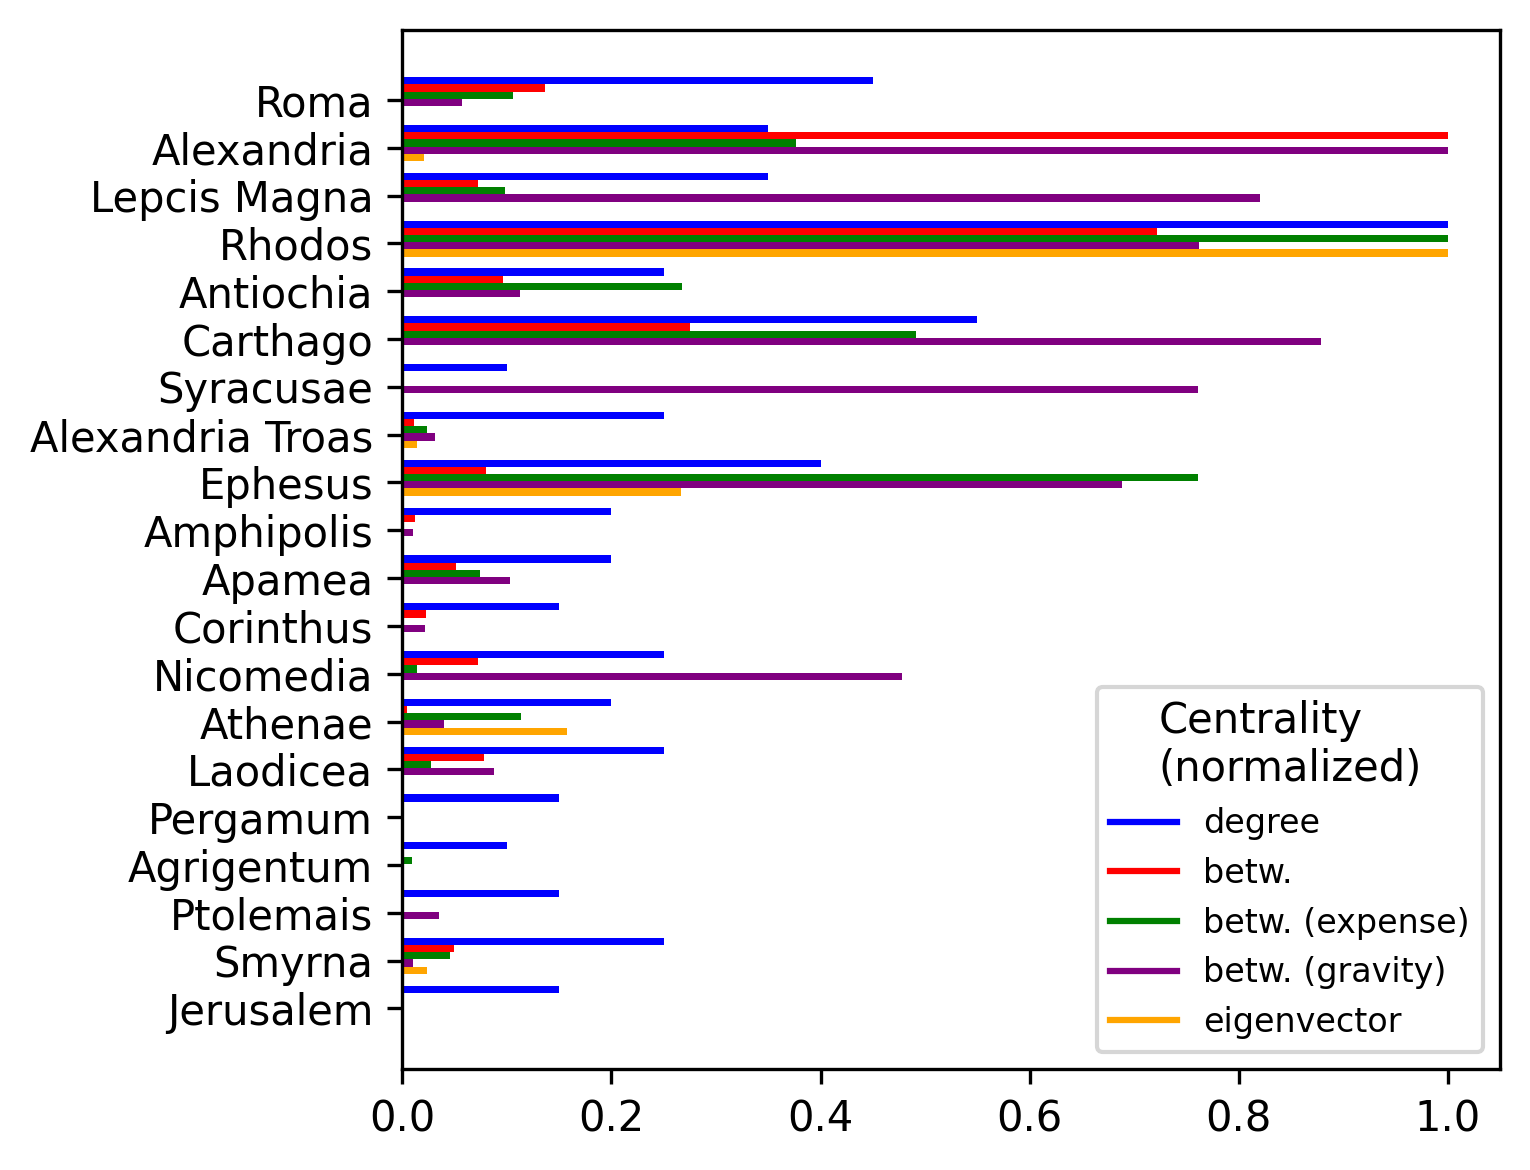

In [414]:
data = nodes.head(20)
idx = np.array([n for n in reversed(range(0, len(data)))])
fig, ax = plt.subplots(figsize=[5.2, 4], tight_layout=True)

for cent, color in zip(centralities, color_values):
    ax.barh(y=idx + cent[1], width=data[cent[0]].apply(lambda x: x / data[cent[0]].max()), height=0.15, color=color)
ax.set_yticks(idx)
ax.set_yticklabels(data["label"].tolist())

markers = [plt.Line2D([0,0],[0,0],color=color) for color in color_values]
plt.legend(markers, [cent[2] for cent in centralities], numpoints=1,  title="Centrality\n(normalized)", fontsize=8, bbox_to_anchor=(1,0), loc="lower right")

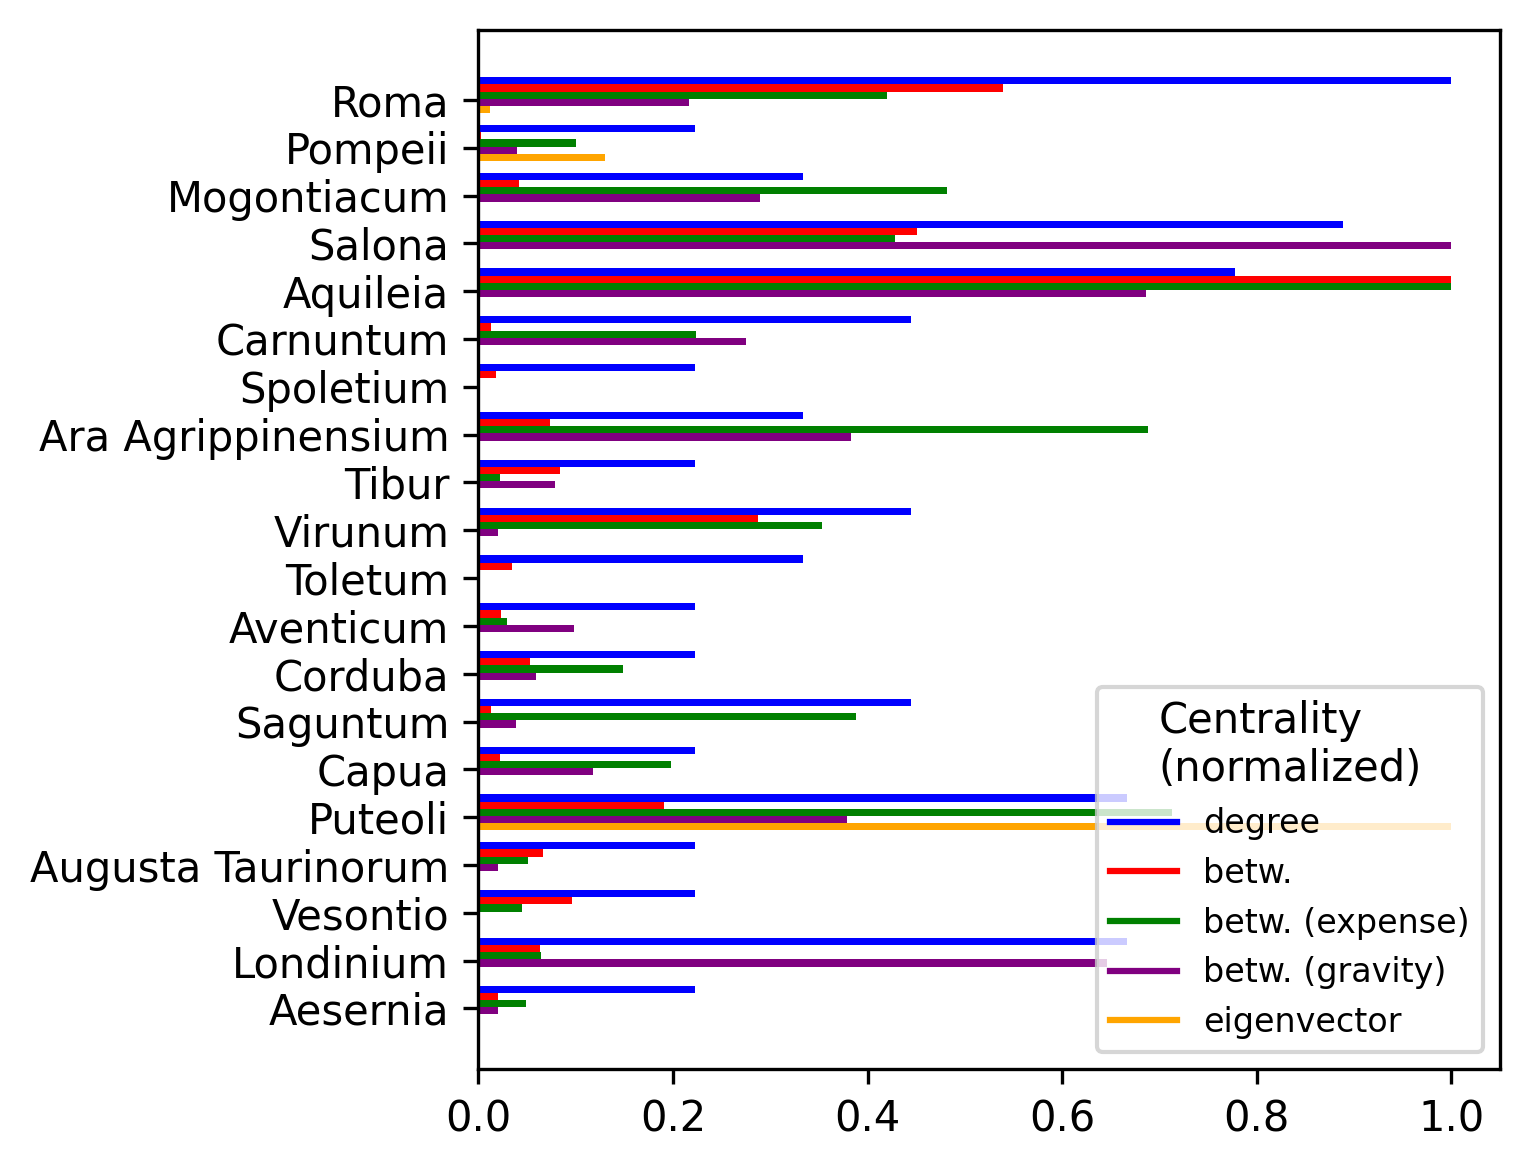

In [421]:
data = nodes.sort_values("LIRE_per1_N", ascending=False).head(20)
idx = np.array([n for n in reversed(range(0, len(data)))])
fig, ax = plt.subplots(figsize=[5.2, 4], tight_layout=True)

for cent, color in zip(centralities, color_values):
    ax.barh(y=idx + cent[1], width=data[cent[0]].apply(lambda x: x / data[cent[0]].max()), height=0.15, color=color)
ax.set_yticks(idx)
ax.set_yticklabels(data["label"].tolist())

markers = [plt.Line2D([0,0],[0,0],color=color) for color in color_values]
plt.legend(markers, [cent[2] for cent in centralities], numpoints=1,  title="Centrality\n(normalized)", fontsize=8, bbox_to_anchor=(1,0), loc="lower right")

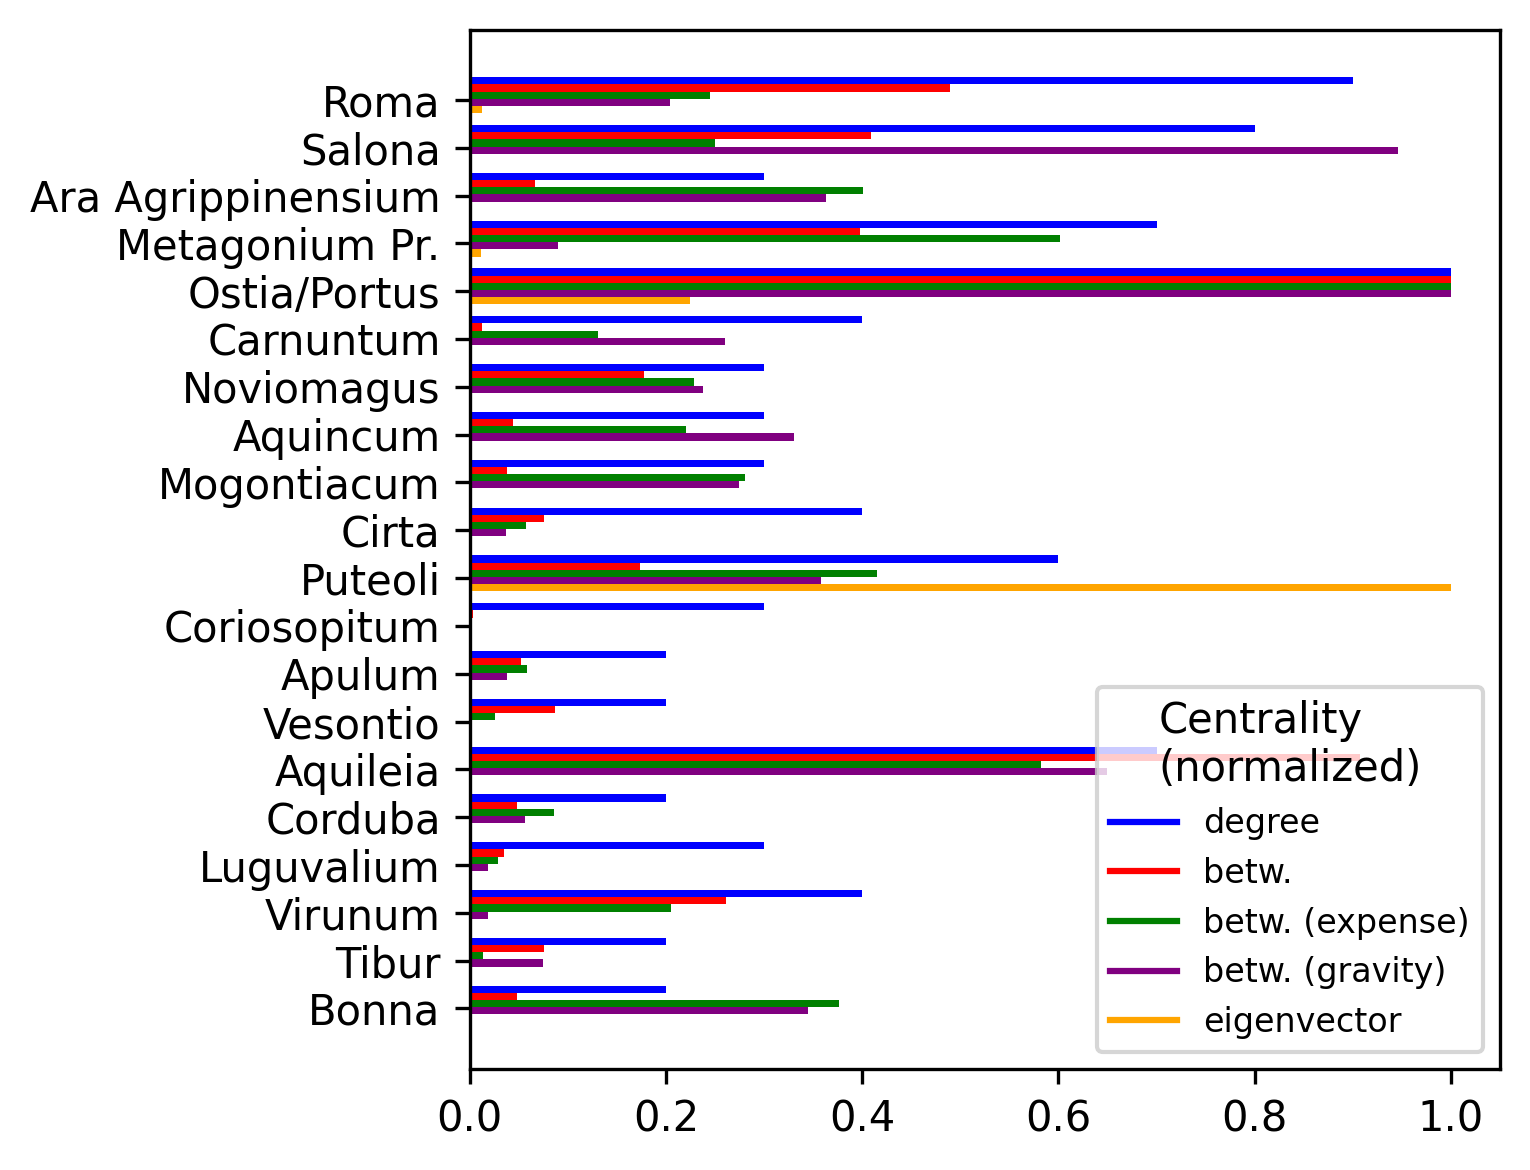

In [419]:
data = nodes.sort_values("LIRE_per2_N", ascending=False).head(20)
idx = np.array([n for n in reversed(range(0, len(data)))])
fig, ax = plt.subplots(figsize=[5.2, 4], tight_layout=True)

for cent, color in zip(centralities, color_values):
    ax.barh(y=idx + cent[1], width=data[cent[0]].apply(lambda x: x / data[cent[0]].max()), height=0.15, color=color)
ax.set_yticks(idx)
ax.set_yticklabels(data["label"].tolist())

markers = [plt.Line2D([0,0],[0,0],color=color) for color in color_values]
plt.legend(markers, [cent[2] for cent in centralities], numpoints=1,  title="Centrality\n(normalized)", fontsize=8, bbox_to_anchor=(1,0), loc="lower right")

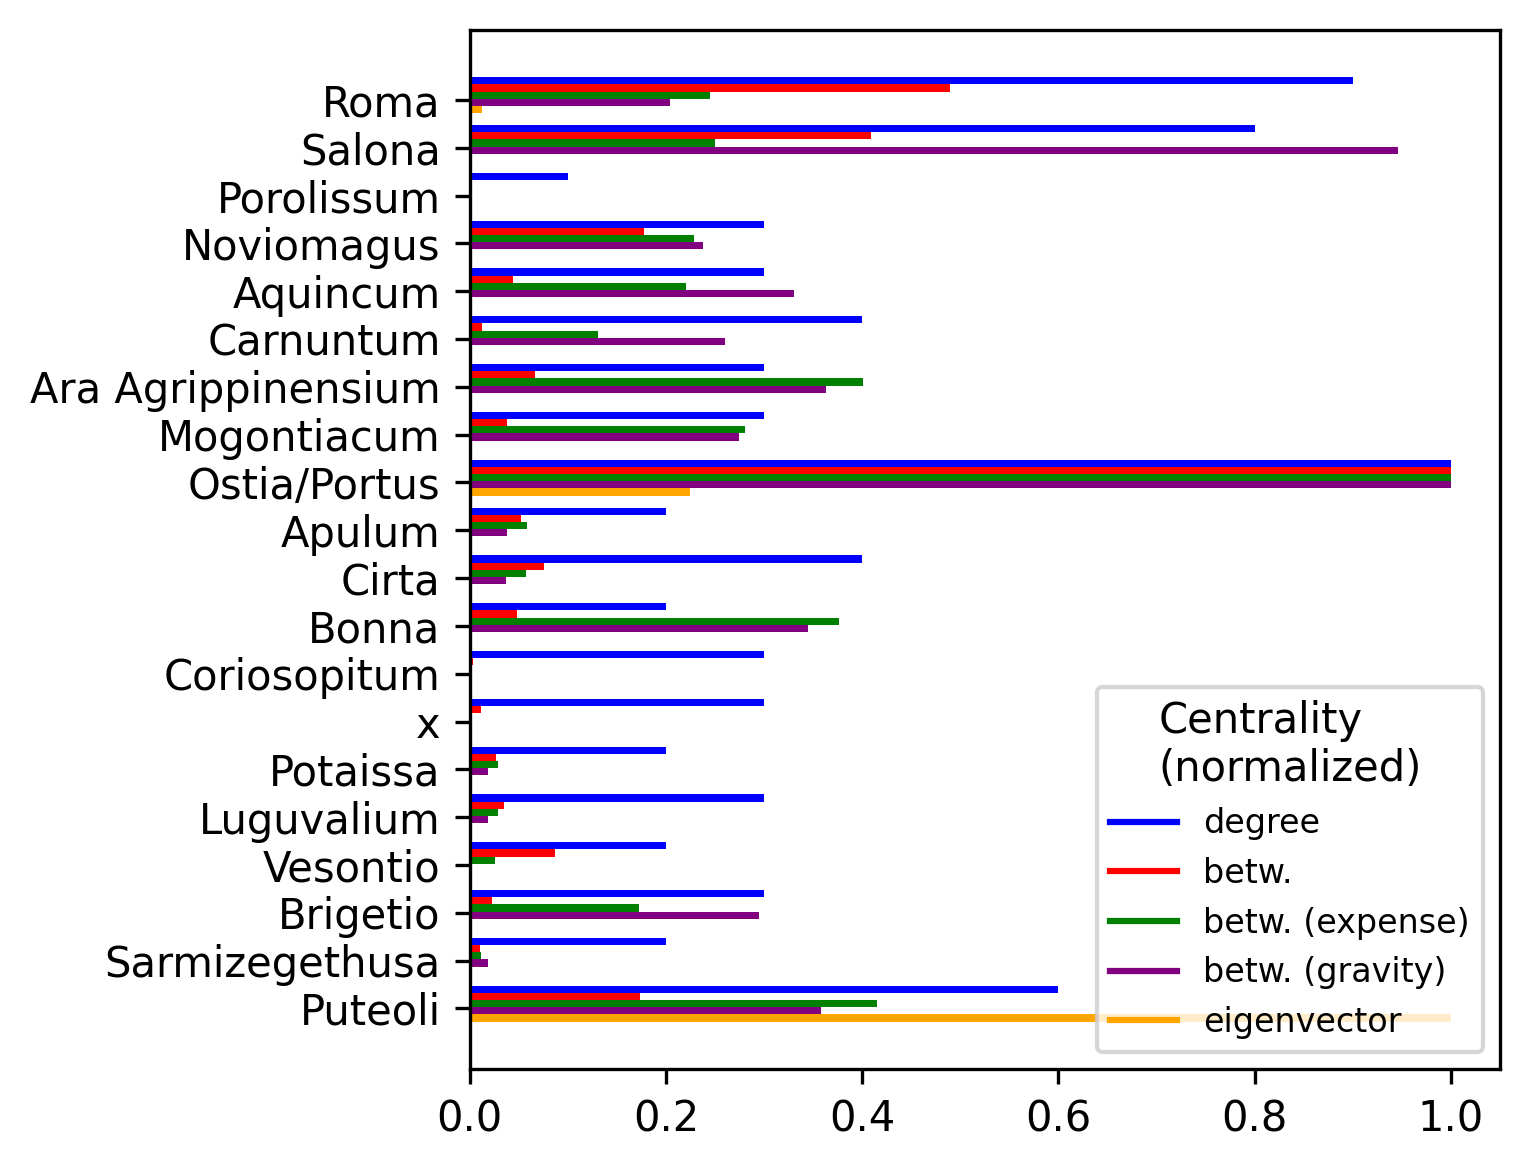

In [417]:
data = nodes.sort_values("LIRE_per3_N", ascending=False).head(20)
idx = np.array([n for n in reversed(range(0, len(data)))])
fig, ax = plt.subplots(figsize=[5.2, 4], tight_layout=True)

for cent, color in zip(centralities, color_values):
    ax.barh(y=idx + cent[1], width=data[cent[0]].apply(lambda x: x / data[cent[0]].max()), height=0.15, color=color)
ax.set_yticks(idx)
ax.set_yticklabels(data["label"].tolist())

markers = [plt.Line2D([0,0],[0,0],color=color) for color in color_values]
plt.legend(markers, [cent[2] for cent in centralities], numpoints=1,  title="Centrality\n(normalized)", fontsize=8, bbox_to_anchor=(1,0), loc="lower right")

In [ ]:
for centrality in []
sns.barplot(y="label", x="bb", data=nodes.head(20), orient="h")

In [283]:
# 10 sites with highest betweenness, unweighted
nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
nodes.sort_values("bb", ascending=False, inplace=True)
nodes.head(10)

,label,x,y,hanson_label,hanson_ID,pop_est,LIRE_total_N,LIRE_per1_N,LIRE_per2_N,LIRE_per3_N,bb,bb_expense,bb_gravity,katz,eigenvector,degree
50516,Messana,38.192,15.557,Messana,1312,11517.0,23,7,10,11,0.446417,0.303628,0.568974,0.000902,3.049195e-05,0.013294
50017,Alexandria,31.200,29.910,Alexandria (Aegyptus),110,410502.0,37,8,11,18,0.403270,0.087966,0.559609,-0.063889,3.216007e-03,0.010340
50613,Rhodos,36.440,28.230,Rhodus,309,130398.0,1,0,1,1,0.291126,0.233671,0.426219,-0.002933,1.583024e-01,0.029542
50179,Gades,36.529,-6.293,Gades,337,14841.0,42,23,23,12,0.237076,0.244443,0.287743,-0.015874,1.311849e-07,0.010340
50545,Apollonia-Sozousa,32.930,21.750,NaN,NaN,1000.0,0,0,0,0,0.159816,0.032348,0.016528,-0.012527,1.959839e-05,0.013294
50283,Olisipo,38.726,-9.145,Olisipo,1089,7376.0,71,47,15,5,0.151507,0.212231,0.239754,0.043191,2.818147e-09,0.008863
50529,Sallentinum Pr.,39.800,18.360,NaN,NaN,1000.0,3,2,3,0,0.141973,0.126764,0.196682,-0.019044,2.316927e-07,0.007386
50084,Flavium Brigantium,43.370,-8.397,NaN,NaN,1000.0,44,12,26,25,0.138836,0.203548,0.230323,0.049222,4.254700e-11,0.005908
50533,Acroceraunia Pr.,40.440,19.320,NaN,NaN,1000.0,7,6,5,2,0.134070,0.131165,0.150223,-0.001500,9.304259e-09,0.010340
50505,Lilybaeum,37.798,12.437,Lilybaeum,1309,15828.0,0,0,0,0,0.126924,0.131314,0.012018,-0.001472,1.285878e-06,0.014771


In [284]:
# 10 sites with highest betweenness, weighted by "expense" attribute
nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
nodes.sort_values("bb_expense", ascending=False, inplace=True)
nodes.head(10)

,label,x,y,hanson_label,hanson_ID,pop_est,LIRE_total_N,LIRE_per1_N,LIRE_per2_N,LIRE_per3_N,bb,bb_expense,bb_gravity,katz,eigenvector,degree
50547,Tainaron Pr.,36.390,22.480,NaN,NaN,1000.0,0,0,0,0,0.017795,0.394396,0.004702,-0.018127,3.926456e-04,0.008863
50552,Malea Pr.,36.440,23.200,NaN,NaN,1000.0,0,0,0,0,0.012433,0.387001,0.001967,0.056533,2.153243e-03,0.005908
50541,Ichthys Pr.,37.650,21.320,NaN,NaN,1000.0,0,0,0,0,0.022727,0.306657,0.012625,0.013956,3.583486e-06,0.010340
50516,Messana,38.192,15.557,Messana,1312,11517.0,23,7,10,11,0.446417,0.303628,0.568974,0.000902,3.049195e-05,0.013294
50542,Alpheos (river),37.610,21.450,NaN,NaN,1000.0,11,9,5,1,0.000393,0.296391,0.008517,-0.128844,4.638627e-06,0.002954
50546,Akitas Pr.,36.720,21.880,NaN,NaN,1000.0,5,1,4,0,0.000123,0.296033,0.005616,-0.166339,4.692734e-05,0.002954
50179,Gades,36.529,-6.293,Gades,337,14841.0,42,23,23,12,0.237076,0.244443,0.287743,-0.015874,1.311849e-07,0.010340
50613,Rhodos,36.440,28.230,Rhodus,309,130398.0,1,0,1,1,0.291126,0.233671,0.426219,-0.002933,1.583024e-01,0.029542
50283,Olisipo,38.726,-9.145,Olisipo,1089,7376.0,71,47,15,5,0.151507,0.212231,0.239754,0.043191,2.818147e-09,0.008863
50550,Isthmia,37.941,22.987,NaN,NaN,1000.0,8,5,7,1,0.017633,0.210527,0.016467,-0.013042,2.366351e-02,0.008863


In [285]:
nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
nodes.sort_values("bb_gravity", ascending=False, inplace=True)
nodes.head(20)

,label,x,y,hanson_label,hanson_ID,pop_est,LIRE_total_N,LIRE_per1_N,LIRE_per2_N,LIRE_per3_N,bb,bb_expense,bb_gravity,katz,eigenvector,degree
50516,Messana,38.192,15.557,Messana,1312,11517.0,23,7,10,11,0.446417,0.303628,0.568974,0.000902,3.049195e-05,0.013294
50017,Alexandria,31.200,29.910,Alexandria (Aegyptus),110,410502.0,37,8,11,18,0.403270,0.087966,0.559609,-0.063889,3.216007e-03,0.010340
50107,Carthago,36.846,10.312,Carthago,172,102074.0,523,105,337,95,0.111114,0.114742,0.491823,-0.028710,7.739493e-08,0.016248
50230,Lepcis Magna,32.637,14.292,Lepcis Magna,180,153722.0,319,70,130,150,0.029279,0.023000,0.458877,-0.016413,2.207440e-07,0.010340
50613,Rhodos,36.440,28.230,Rhodus,309,130398.0,1,0,1,1,0.291126,0.233671,0.426219,-0.002933,1.583024e-01,0.029542
50455,Syracusae,37.072,15.295,Syracusae,1320,83831.0,127,61,92,36,0.000000,0.000000,0.425660,-0.010336,3.197834e-06,0.002954
50456,Portus Pachyni,36.681,15.137,NaN,NaN,1000.0,0,0,0,0,0.029452,0.105880,0.425253,-0.011799,8.462172e-06,0.013294
50492,Meninge,33.680,10.920,Meninx,187,6368.0,21,4,9,5,0.008961,0.009719,0.424751,0.027586,8.573101e-09,0.005908
50169,Ephesus,37.939,27.348,Ephesus,276,71584.0,66,25,23,11,0.032281,0.177952,0.385271,-0.005627,4.212022e-02,0.011817
50449,Thabraca,36.953,8.750,Thabraca,1256,1000.0,1,0,0,1,0.059945,0.056348,0.342343,0.001070,5.217324e-09,0.008863


In [287]:
### # pelagios provinces - to be used as a base map in our plots
url = "https://raw.githubusercontent.com/pelagios/magis-pleiades-regions/main/pleiades-regions-magis-pelagios.geojson"
pleiades_regions = gpd.read_file(url)
pleiades_regions.head(5)

,name,uri,geometry
0,Lusitania,http://pleiades.stoa.org/places/1101,"POLYGON ((-7.31057 37.19663, -7.32457 37.19556..."
1,Byzacena,http://pleiades.stoa.org/places/991345,"MULTIPOLYGON (((11.01815 34.62424, 11.00879 34..."
2,Viennensis,http://pleiades.stoa.org/places/992074,"POLYGON ((4.62344 45.60642, 4.71224 45.60876, ..."
3,Lycia et Pamphylia,http://pleiades.stoa.org/places/981530,"MULTIPOLYGON (((29.62331 36.07470, 29.61295 36..."
4,Savia,http://pleiades.stoa.org/places/991357,"POLYGON ((18.10598 45.77203, 18.10654 45.71079..."


In [288]:
orbis_hanson_gpd = gpd.read_parquet("../data/orbis_hanson_lire.par")
positions = dict(zip([str(x) for x in orbis_hanson_gpd["id"].tolist()], list(np.column_stack((orbis_hanson_gpd["y"], orbis_hanson_gpd["x"])))))

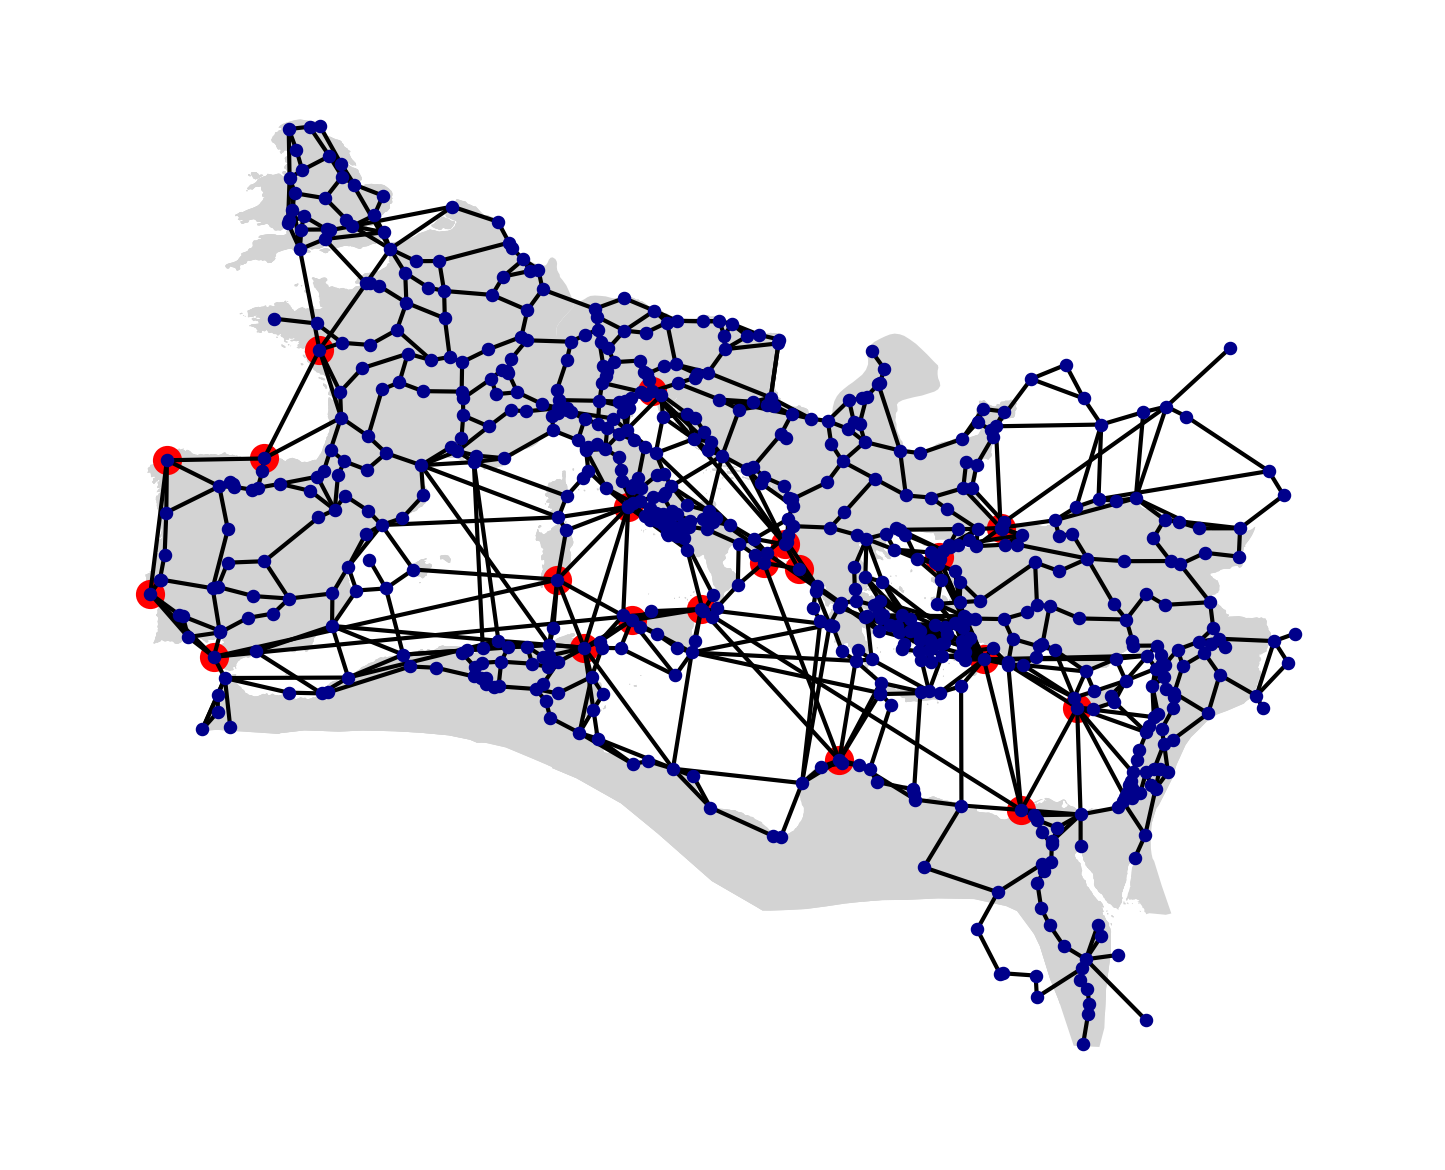

In [289]:
fig, ax = plt.subplots(figsize=[5.2, 4], tight_layout=True)
pleiades_regions.plot(color="lightgray", ax=ax)

red_nodes = nodes.sort_values("bb", ascending=False)
N = 20

plt.scatter(red_nodes["y"][:N], red_nodes["x"][:N], color="red")

nx.draw(G, positions, with_labels=False, node_size=5, node_color="darkblue", node_shape="o", linewidths=1, ax=ax)

ax.set_axis_off()

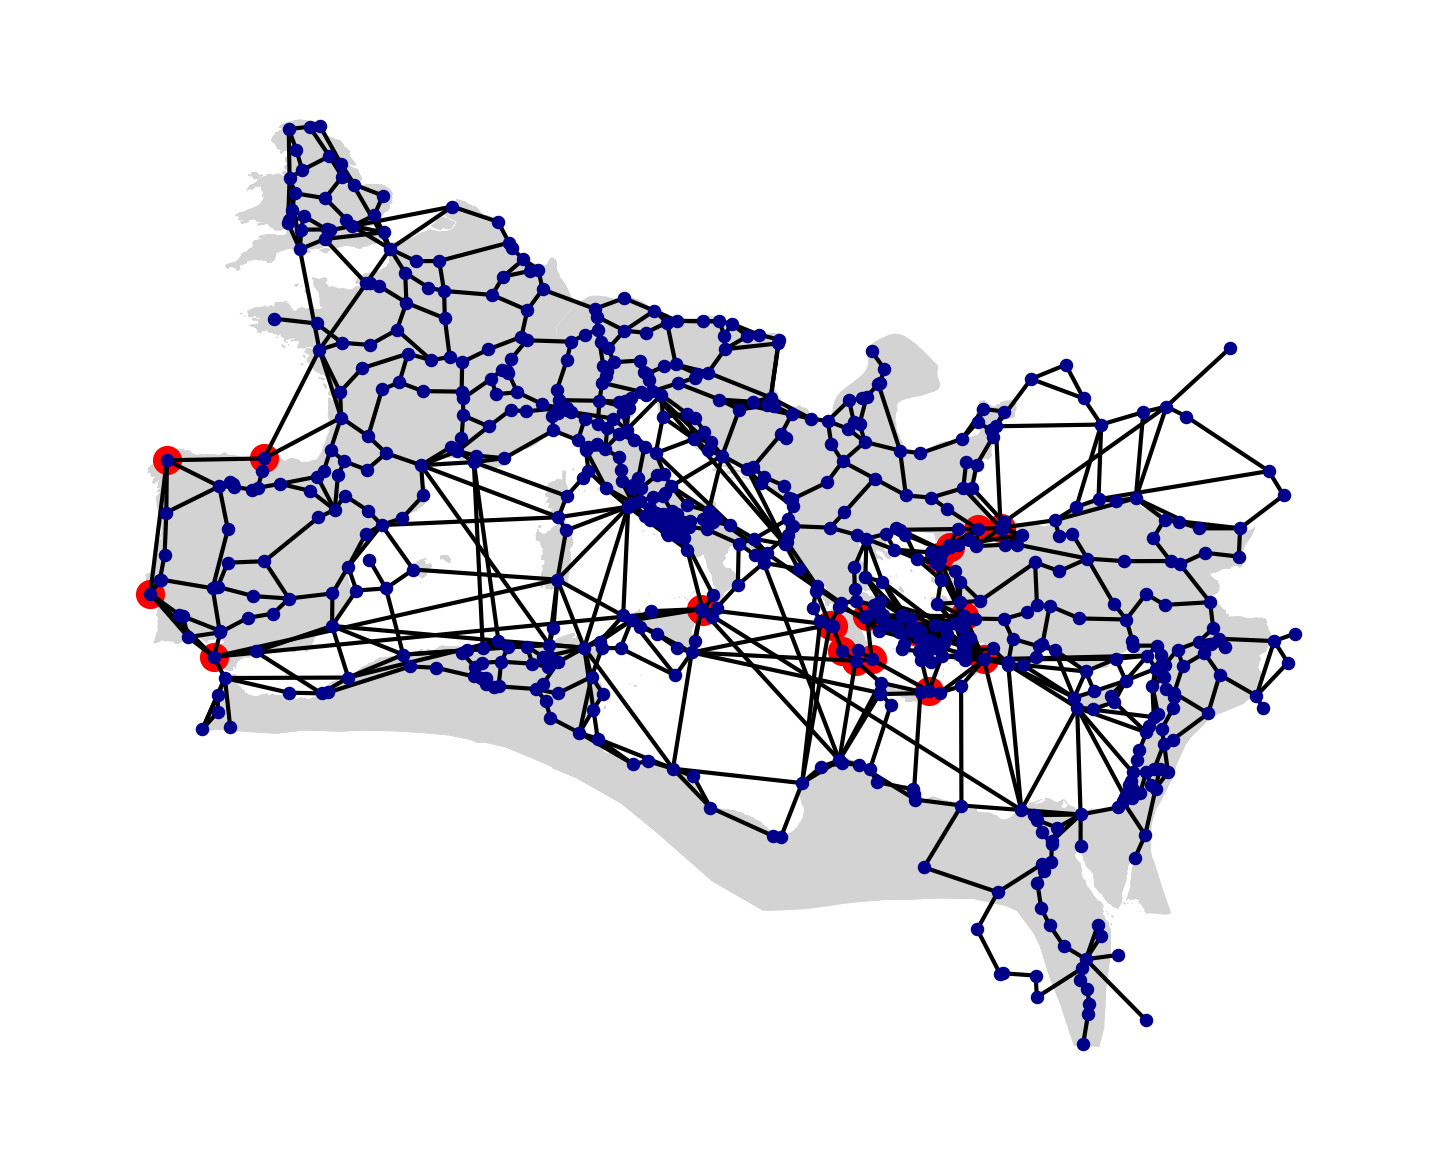

In [290]:
fig, ax = plt.subplots(figsize=[5.2, 4], tight_layout=True)
pleiades_regions.plot(color="lightgray", ax=ax)

red_nodes = nodes.sort_values("bb_expense", ascending=False)
N = 20

plt.scatter(red_nodes["y"][:N], red_nodes["x"][:N], color="red")

nx.draw(G, positions, with_labels=False, node_size=5, node_color="darkblue", node_shape="o", linewidths=1, ax=ax)

ax.set_axis_off()

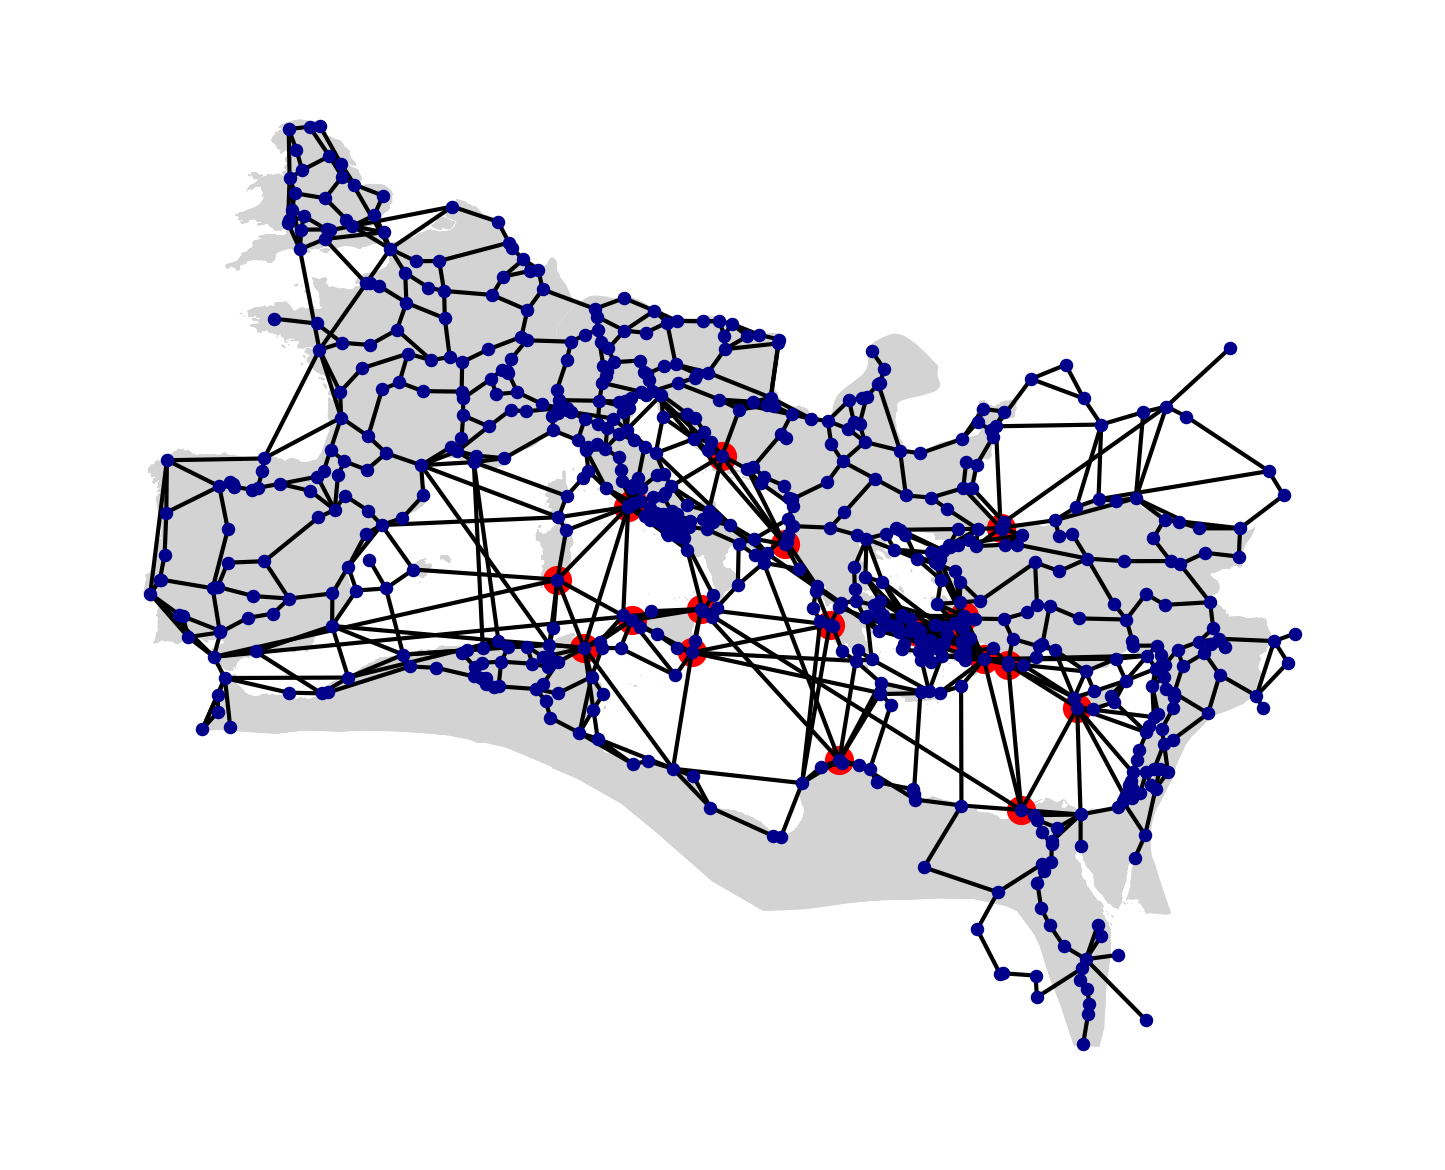

In [291]:
fig, ax = plt.subplots(figsize=[5.2, 4], tight_layout=True)
pleiades_regions.plot(color="lightgray", ax=ax)

red_nodes = nodes.sort_values("degree", ascending=False)
N = 20

plt.scatter(red_nodes["y"][:N], red_nodes["x"][:N], color="red")

nx.draw(G, positions, with_labels=False, node_size=5, node_color="darkblue", node_shape="o", linewidths=1, ax=ax)

ax.set_axis_off()

In [292]:
nodes[["pop_est", "LIRE_total_N", "LIRE_per1_N", "LIRE_per2_N", "LIRE_per3_N", "bb", "bb_expense", "degree", "katz", "eigenvector"]].corr()

,pop_est,LIRE_total_N,LIRE_per1_N,LIRE_per2_N,LIRE_per3_N,bb,bb_expense,degree,katz,eigenvector
pop_est,1.000000,0.833316,0.803050,0.775205,0.674682,0.276941,0.057398,0.259586,-0.002704,0.008960
LIRE_total_N,0.833316,1.000000,0.980055,0.966019,0.880731,0.051614,-0.004179,0.132885,0.078942,-0.026196
LIRE_per1_N,0.803050,0.980055,1.000000,0.928305,0.835991,0.042980,-0.008491,0.119084,0.078724,-0.028818
LIRE_per2_N,0.775205,0.966019,0.928305,1.000000,0.949354,0.056345,-0.008871,0.146595,0.091355,-0.040776
LIRE_per3_N,0.674682,0.880731,0.835991,0.949354,1.000000,0.046397,-0.019449,0.128754,0.103804,-0.047569
bb,0.276941,0.051614,0.042980,0.056345,0.046397,1.000000,0.523473,0.543310,-0.043880,0.003829
bb_expense,0.057398,-0.004179,-0.008491,-0.008871,-0.019449,0.523473,1.000000,0.463076,-0.100424,0.040515
degree,0.259586,0.132885,0.119084,0.146595,0.128754,0.543310,0.463076,1.000000,-0.112335,0.291392
katz,-0.002704,0.078942,0.078724,0.091355,0.103804,-0.043880,-0.100424,-0.112335,1.000000,-0.040247
eigenvector,0.008960,-0.026196,-0.028818,-0.040776,-0.047569,0.003829,0.040515,0.291392,-0.040247,1.000000


In [293]:
nodes_gdf = gpd.GeoDataFrame(nodes, geometry=gpd.points_from_xy(nodes["y"], nodes["x"])) #, crs={"init": "epsg:3

In [294]:
url = "https://datahub.io/core/geo-countries/r/countries.geojson"
countries = gpd.read_file(url)

In [295]:
countries["ADMIN"].tolist()

['Aruba',
 'Afghanistan',
 'Angola',
 'Anguilla',
 'Albania',
 'Aland',
 'Andorra',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antarctica',
 'Ashmore and Cartier Islands',
 'French Southern and Antarctic Lands',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'The Bahamas',
 'Bosnia and Herzegovina',
 'Bajo Nuevo Bank (Petrel Is.)',
 'Saint Barthelemy',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Switzerland',
 'Chile',
 'China',
 'Ivory Coast',
 'Clipperton Island',
 'Cameroon',
 'Cyprus No Mans Area',
 'Democratic Republic of the Congo',
 'Republic of Congo',
 'Cook Islands',
 'Colombia',
 'Comoros',
 'Cape Verde',
 'Costa Rica',
 'Coral Sea Islands',
 'Cuba',
 'Curaçao',
 'Cayman Islands',
 'Northern Cyprus',
 'Cyprus',
 'Czech Republic',
 'Germ

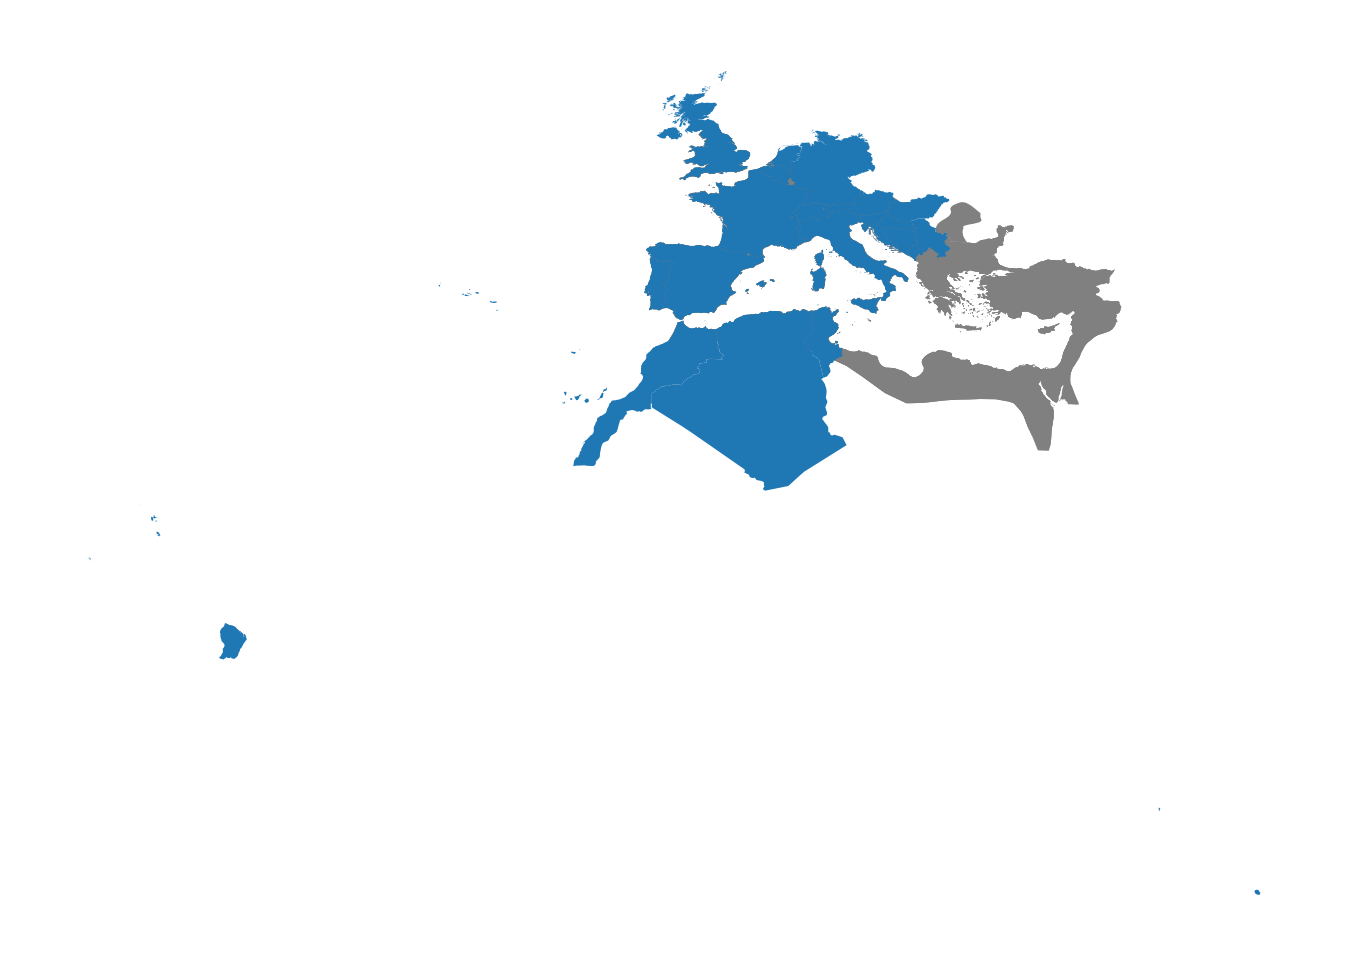

In [296]:
ax = pleiades_regions.plot(color="grey")

countries_latin = ["Tunisia", "Italy", "Switzerland", "France", 'Spain', "Croatia", "Montenegro", "Republic of Serbia", "Bosnia and Herzegovina", 'United Kingdom', 'Croatia', 'Germany', 'Belgium', 'Netherlands', 'Portugal', 'Slovenia', 'Algeria', 'Morocco', 'Austria', 'Hungary']
countries_west = countries[countries["ADMIN"].isin(countries_latin)]
countries_west.plot(ax=ax)
ax.set_axis_off()

In [297]:
countries_west_union = countries_west.unary_union

In [298]:
nodes_west = nodes_gdf[nodes_gdf.within(countries_west_union)]

<AxesSubplot:>

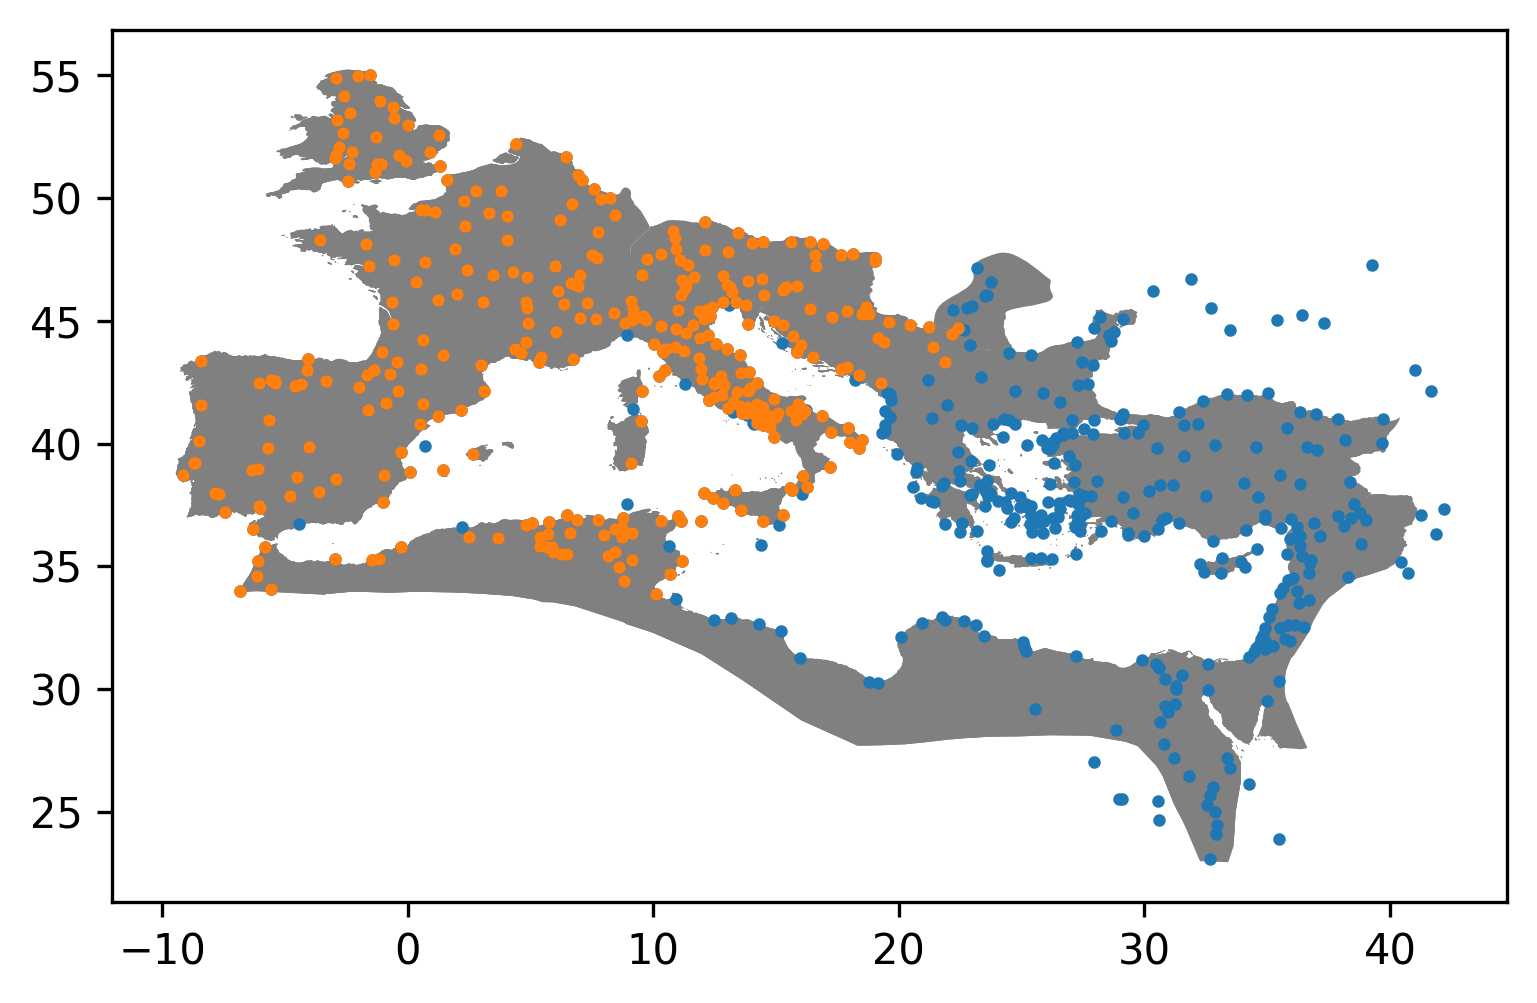

In [299]:
ax = pleiades_regions.plot(color="grey")
nodes_gdf.plot(markersize=4, ax=ax)
nodes_west.plot(markersize=4, ax=ax)

In [301]:
nodes_west[["pop_est", "LIRE_total_N", "LIRE_per1_N", "LIRE_per2_N", "LIRE_per3_N", "bb", "bb_expense", "bb_gravity", "eigenvector", "katz"]].corr()

,pop_est,LIRE_total_N,LIRE_per1_N,LIRE_per2_N,LIRE_per3_N,bb,bb_expense,bb_gravity,eigenvector,katz
pop_est,1.000000,0.961379,0.928071,0.906366,0.808915,0.093282,0.030805,0.080494,0.011200,0.127685
LIRE_total_N,0.961379,1.000000,0.981473,0.969412,0.895847,0.070967,0.008760,0.012494,-0.013903,0.169695
LIRE_per1_N,0.928071,0.981473,1.000000,0.932659,0.858850,0.056906,0.001215,0.004037,-0.016372,0.168651
LIRE_per2_N,0.906366,0.969412,0.932659,1.000000,0.961562,0.079635,0.008530,0.023823,-0.021198,0.189037
LIRE_per3_N,0.808915,0.895847,0.858850,0.961562,1.000000,0.071826,-0.000152,0.038799,-0.023824,0.213414
bb,0.093282,0.070967,0.056906,0.079635,0.071826,1.000000,0.792580,0.652663,0.600368,-0.016715
bb_expense,0.030805,0.008760,0.001215,0.008530,-0.000152,0.792580,1.000000,0.701863,0.477127,-0.056412
bb_gravity,0.080494,0.012494,0.004037,0.023823,0.038799,0.652663,0.701863,1.000000,0.466107,-0.115955
eigenvector,0.011200,-0.013903,-0.016372,-0.021198,-0.023824,0.600368,0.477127,0.466107,1.000000,-0.043697
katz,0.127685,0.169695,0.168651,0.189037,0.213414,-0.016715,-0.056412,-0.115955,-0.043697,1.000000


In [302]:
nodes_gdf[["pop_est", "LIRE_total_N", "LIRE_per1_N", "LIRE_per2_N", "LIRE_per3_N", "bb", "bb_expense", "bb_gravity", "eigenvector", "katz"]].corr()

,pop_est,LIRE_total_N,LIRE_per1_N,LIRE_per2_N,LIRE_per3_N,bb,bb_expense,bb_gravity,eigenvector,katz
pop_est,1.000000,0.833316,0.803050,0.775205,0.674682,0.276941,0.057398,0.231100,0.008960,-0.002704
LIRE_total_N,0.833316,1.000000,0.980055,0.966019,0.880731,0.051614,-0.004179,0.009604,-0.026196,0.078942
LIRE_per1_N,0.803050,0.980055,1.000000,0.928305,0.835991,0.042980,-0.008491,0.002929,-0.028818,0.078724
LIRE_per2_N,0.775205,0.966019,0.928305,1.000000,0.949354,0.056345,-0.008871,0.018367,-0.040776,0.091355
LIRE_per3_N,0.674682,0.880731,0.835991,0.949354,1.000000,0.046397,-0.019449,0.027261,-0.047569,0.103804
bb,0.276941,0.051614,0.042980,0.056345,0.046397,1.000000,0.523473,0.609494,0.003829,-0.043880
bb_expense,0.057398,-0.004179,-0.008491,-0.008871,-0.019449,0.523473,1.000000,0.487745,0.040515,-0.100424
bb_gravity,0.231100,0.009604,0.002929,0.018367,0.027261,0.609494,0.487745,1.000000,-0.005005,-0.066789
eigenvector,0.008960,-0.026196,-0.028818,-0.040776,-0.047569,0.003829,0.040515,-0.005005,1.000000,-0.040247
katz,-0.002704,0.078942,0.078724,0.091355,0.103804,-0.043880,-0.100424,-0.066789,-0.040247,1.000000


In [309]:
nodes_west[[
    "pop_est", "LIRE_total_N", "LIRE_per1_N", "LIRE_per2_N", "LIRE_per3_N", "bb", "bb_expense", "bb_gravity", "eigenvector", "katz"
]].sort_values("pop_est", ascending=False).head(100).corr()

,pop_est,LIRE_total_N,LIRE_per1_N,LIRE_per2_N,LIRE_per3_N,bb,bb_expense,bb_gravity,eigenvector,katz
pop_est,1.000000,0.970008,0.934990,0.934040,0.849045,0.065117,-0.001060,0.045127,-0.017383,0.246424
LIRE_total_N,0.970008,1.000000,0.984393,0.979298,0.921796,0.058570,-0.006078,-0.010778,-0.030101,0.303432
LIRE_per1_N,0.934990,0.984393,1.000000,0.948885,0.893462,0.042290,-0.013864,-0.023152,-0.035466,0.312931
LIRE_per2_N,0.934040,0.979298,0.948885,1.000000,0.974835,0.066663,-0.005005,0.007145,-0.039123,0.318528
LIRE_per3_N,0.849045,0.921796,0.893462,0.974835,1.000000,0.058571,-0.013550,0.016919,-0.045373,0.335004
bb,0.065117,0.058570,0.042290,0.066663,0.058571,1.000000,0.827612,0.668924,0.677071,-0.105755
bb_expense,-0.001060,-0.006078,-0.013864,-0.005005,-0.013550,0.827612,1.000000,0.714138,0.620888,-0.140547
bb_gravity,0.045127,-0.010778,-0.023152,0.007145,0.016919,0.668924,0.714138,1.000000,0.564526,-0.248438
eigenvector,-0.017383,-0.030101,-0.035466,-0.039123,-0.045373,0.677071,0.620888,0.564526,1.000000,-0.083796
katz,0.246424,0.303432,0.312931,0.318528,0.335004,-0.105755,-0.140547,-0.248438,-0.083796,1.000000
